# Universidad del Desarrollo - Facultad de Ingeniería
### TERCERA EVALUACIÓN DEL CURSO
## PROYECTO INTEGRADO DE MACHINE LEARNING PARA MARKETING BANCARIO

---

### 1. CONTEXTO DEL PROYECTO

El Banco de Portugal ejecuta campañas de marketing para promover depósitos a plazo. Contactar a toda la base sin segmentación genera ineficiencias. Se solicita un análisis de machine learning que permita identificar segmentos de clientes y predecir la probabilidad de contratación.

### 2. OBJETIVOS DEL PROYECTO

* Analizar el dataset Bank Marketing (UCI).
* Construir un pipeline completo: EDA, preprocesamiento, modelamiento y validación.
* Aplicar métodos no supervisados (PCA, K-Means o similares).
* Entrenar y optimizar SVM, Random Forest, GBM y XGBoost mediante GridSearchCV.
* Comparar modelos con métricas profesionales (AUC, F1).
* Entregar recomendaciones ejecutivas basadas en evidencia.

### 3. TAREAS A REALIZAR

* Justificar el problema y el dataset.
* EDA completa.
* Preprocesar datos (encoding, escalamiento, división train/val/test).
* Aplicar al menos un método no supervisado.
* Construir baseline (Regresión Logística).
* Entrenar modelos avanzados (SVM, RF, GBM, XGBoost) con GridSearchCV.
* Comparar modelos y elegir uno.
* Presentar una conclusión ejecutiva.

### 4. RÚBRICA DE EVALUACIÓN (100 puntos totales)

* **Planteamiento del problema y contexto (10 pts)**
    * Claridad y relevancia del problema.
    * Justificación del dataset.

* **EDA y análisis descriptivo (15 pts)**
    * Profundidad y calidad del análisis.
    * Uso correcto de gráficos y hallazgos.

* **Preprocesamiento (10 pts)**
    * Encoding, escalamiento y división correctos.
    * Justificación técnica adecuada.

* **Modelos no supervisados (15 pts)**
    * Implementación de PCA/K-Means/etc.
    * Interpretación útil para marketing.

* **Modelo baseline (5 pts)**
    * Implementación correcta e interpretación.

* **SVM optimizado con GridSearchCV (10 pts)**
    * Kernels, ajuste, análisis crítico.

* **Random Forest con GridSearchCV (10 pts)**
    * Ajuste adecuado, importancia de variables.

* **Gradient Boosting con GridSearchCV (10 pts)**
    * Parámetros bien ajustados y explicados.

* **XGBoost con GridSearchCV (10 pts)**
    * Ajuste, interpretación, tiempos de entrenamiento.

* **Comparación final de modelos (10 pts)**
    * Uso de AUC, F1, matriz de confusión.
    * Justificación del modelo ganador.

* **Conclusión ejecutiva (5 pts)**
    * Claridad, coherencia, utilidad para gerencia.

**Total: 100 puntos.**

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
# Cargar datos desde la carpeta data

df = pd.read_csv('data/bank-full.csv', sep=';')

# Configuración para mostrar gráficos en el notebook
%matplotlib inline
sns.set(style="whitegrid")

### Diccionario de Datos: Bank Marketing Dataset

El siguiente diccionario describe las variables contenidas en el archivo `bank-full.csv`, basado en el repositorio UCI Machine Learning y el análisis inicial de los datos.

| Variable | Tipo de Dato | Descripción | Valores / Rango Observado |
| :--- | :--- | :--- | :--- |
| **age** | Numérico (int) | Edad del cliente. | 18 - 95 |
| **job** | Categórico | Ocupación laboral del cliente. | 'management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student' |
| **marital** | Categórico | Estado civil. | 'married', 'single', 'divorced' |
| **education** | Categórico | Nivel de educación alcanzado. | 'tertiary', 'secondary', 'unknown', 'primary' |
| **default** | Binario | ¿Tiene crédito en default (impago)? | 'no', 'yes' |
| **balance** | Numérico (int) | Saldo medio anual en euros. | -8,019 a 102,127 |
| **housing** | Binario | ¿Tiene préstamo hipotecario? | 'yes', 'no' |
| **loan** | Binario | ¿Tiene préstamo personal? | 'no', 'yes' |
| **contact** | Categórico | Medio de comunicación del contacto. | 'unknown', 'cellular', 'telephone' |
| **day** | Numérico (int) | Día del mes del último contacto. | 1 - 31 |
| **month** | Categórico | Mes del año del último contacto. | 'may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep' |
| **duration** | Numérico (int) | Duración del último contacto en segundos. **Nota:** Esta variable afecta fuertemente al target (si duration=0, y='no'). | 0 - 4,918 |
| **campaign** | Numérico (int) | Número de contactos realizados durante esta campaña para este cliente. | 1 - 63 |
| **pdays** | Numérico (int) | Número de días transcurridos desde el último contacto de una campaña anterior. `-1` indica que no fue contactado previamente. | -1 a 871 |
| **previous** | Numérico (int) | Número de contactos realizados antes de esta campaña. | 0 - 275 |
| **poutcome** | Categórico | Resultado de la campaña de marketing anterior. | 'unknown', 'failure', 'other', 'success' |
| **y** | Binario (Target) | ¿El cliente ha suscrito un depósito a plazo? | 'no', 'yes' |

In [3]:
# Resumen estadístico del Dataset Cargado

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
                age        balance           day      duration      campaign  \
count  45211.0

### Fase limpieza de Datos

In [4]:
# --- FASE DE LIMPIEZA DE DATOS ---

# 1. Tratamiento de Valores "unknown"
# En este dataset, los nulos vienen como string 'unknown'.
# Vamos a contar cuántos hay por columna para decidir qué hacer.
cols_with_unknown = [col for col in df.columns if 'unknown' in df[col].unique().astype(str)]
print("Conteo de valores 'unknown' por variable:")
for col in cols_with_unknown:
    count = df[df[col] == 'unknown'].shape[0]
    pct = (count / len(df)) * 100
    print(f"{col}: {count} ({pct:.2f}%)")

Conteo de valores 'unknown' por variable:
job: 288 (0.64%)
education: 1857 (4.11%)
contact: 13020 (28.80%)
poutcome: 36959 (81.75%)


In [5]:
# 2. Eliminación de Duplicados
# A veces se generan registros idénticos por errores de sistema.
duplicates = df.duplicated().sum()
print(f"\nRegistros duplicados encontrados: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicados eliminados. Nuevo tamaño del dataset: {df.shape}")
else:
    print("No se requiere eliminar duplicados.")


Registros duplicados encontrados: 0
No se requiere eliminar duplicados.


In [6]:
# 3. Corrección de Lógica de Negocio (Data Leakage)
# ADVERTENCIA CRÍTICA: La variable 'duration' (duración de la llamada).
# Según la documentación de UCI: "Esta variable solo se conoce al finalizar la llamada".
# Si el objetivo es predecir A QUIÉN llamar, no podemos saber la duración antes.
# Incluirla infla artificialmente las métricas (si duration=0, y='no' siempre).

# Para un modelo realista de 'targeting', deberíamos eliminarla.
# Sin embargo, para fines académicos, a veces se mantiene para ver su impacto.
# Vamos a crear una copia sin ella para el modelado realista.

df_clean = df.drop(columns=['duration']).copy()
print("\nVariable 'duration' eliminada para evitar Data Leakage en el modelo predictivo.")


Variable 'duration' eliminada para evitar Data Leakage en el modelo predictivo.


In [7]:
# 4. Manejo de 'pdays'
# -1 indica que no fue contactado. Para algunos algoritmos esto puede ser confuso numéricamente.
# Una técnica común es crear una bandera binaria "fue_contactado_antes".
df_clean['pdays_contacted'] = df_clean['pdays'].apply(lambda x: 0 if x == -1 else 1)

In [8]:
# Verificación final
print("\nEstructura final del dataset limpio:")
print(df_clean.info())


Estructura final del dataset limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45211 non-null  int64 
 1   job              45211 non-null  object
 2   marital          45211 non-null  object
 3   education        45211 non-null  object
 4   default          45211 non-null  object
 5   balance          45211 non-null  int64 
 6   housing          45211 non-null  object
 7   loan             45211 non-null  object
 8   contact          45211 non-null  object
 9   day              45211 non-null  int64 
 10  month            45211 non-null  object
 11  campaign         45211 non-null  int64 
 12  pdays            45211 non-null  int64 
 13  previous         45211 non-null  int64 
 14  poutcome         45211 non-null  object
 15  y                45211 non-null  object
 16  pdays_contacted  45211 non-null  int64

NOTA DE DECISIÓN:
- **'poutcome'** tiene 81% de unknown. Eliminar esas filas reduciría demasiado el dataset.
  Lo mantendremos como una categoría válida ("No contactado previamente").
- **'job'** y **'education'** tienen pocos unknown (<5%). Podríamos imputar, pero
  para modelos de árbol (RF, XGB) 'unknown' sirve como categoría. Lo dejamos así.

* Construir un pipeline completo: EDA, preprocesamiento, modelamiento y validación.

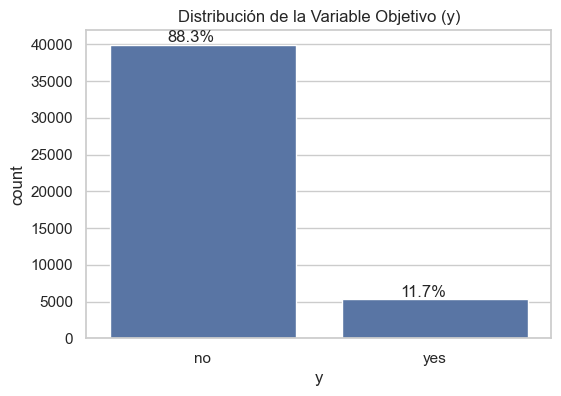

In [9]:
# 1. Distribución de la variable objetivo (y)
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='y', data=df_clean, order=df_clean['y'].value_counts().index)
plt.title('Distribución de la Variable Objetivo (y)')
# Agregar porcentajes
total = len(df_clean)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

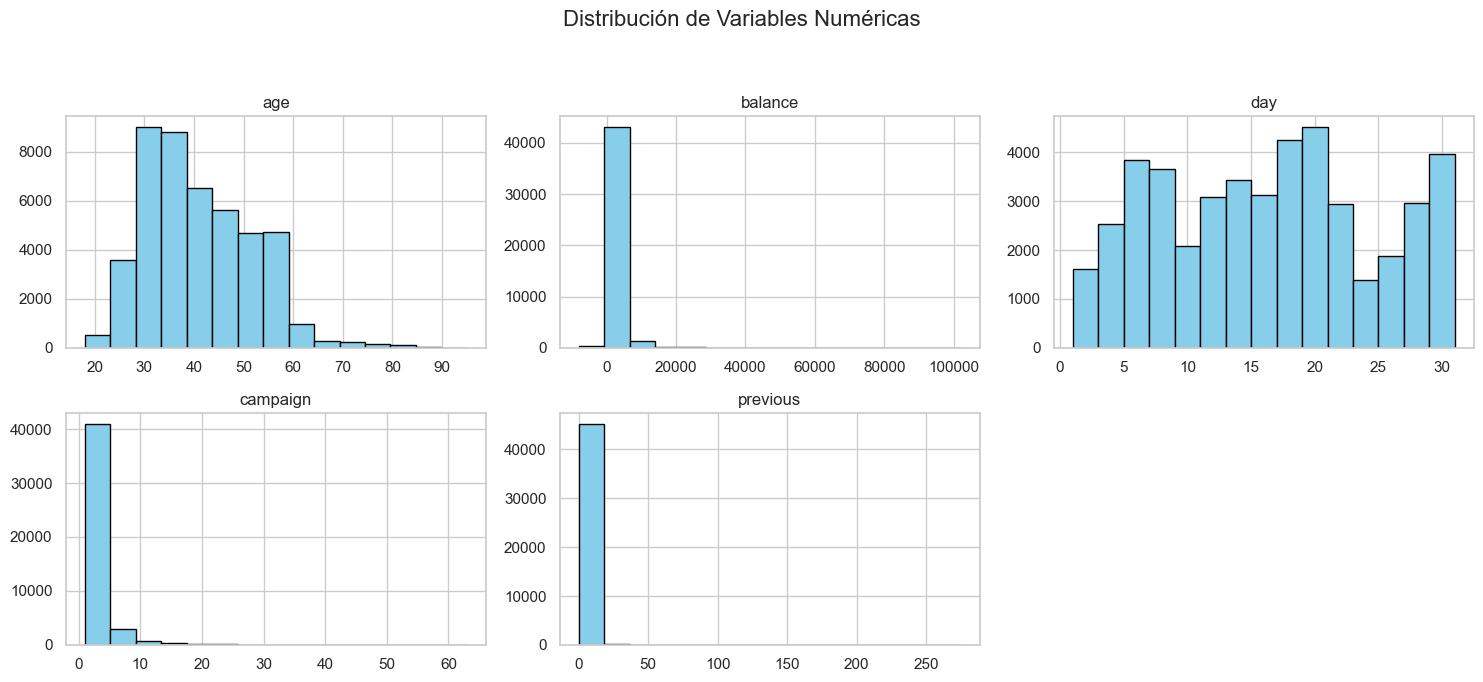

In [10]:
# 2. Histogramas de Variables Numéricas
num_cols = ['age', 'balance', 'day', 'campaign', 'previous']
df_clean[num_cols].hist(bins=15, figsize=(15, 10), layout=(3, 3), color='skyblue', edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

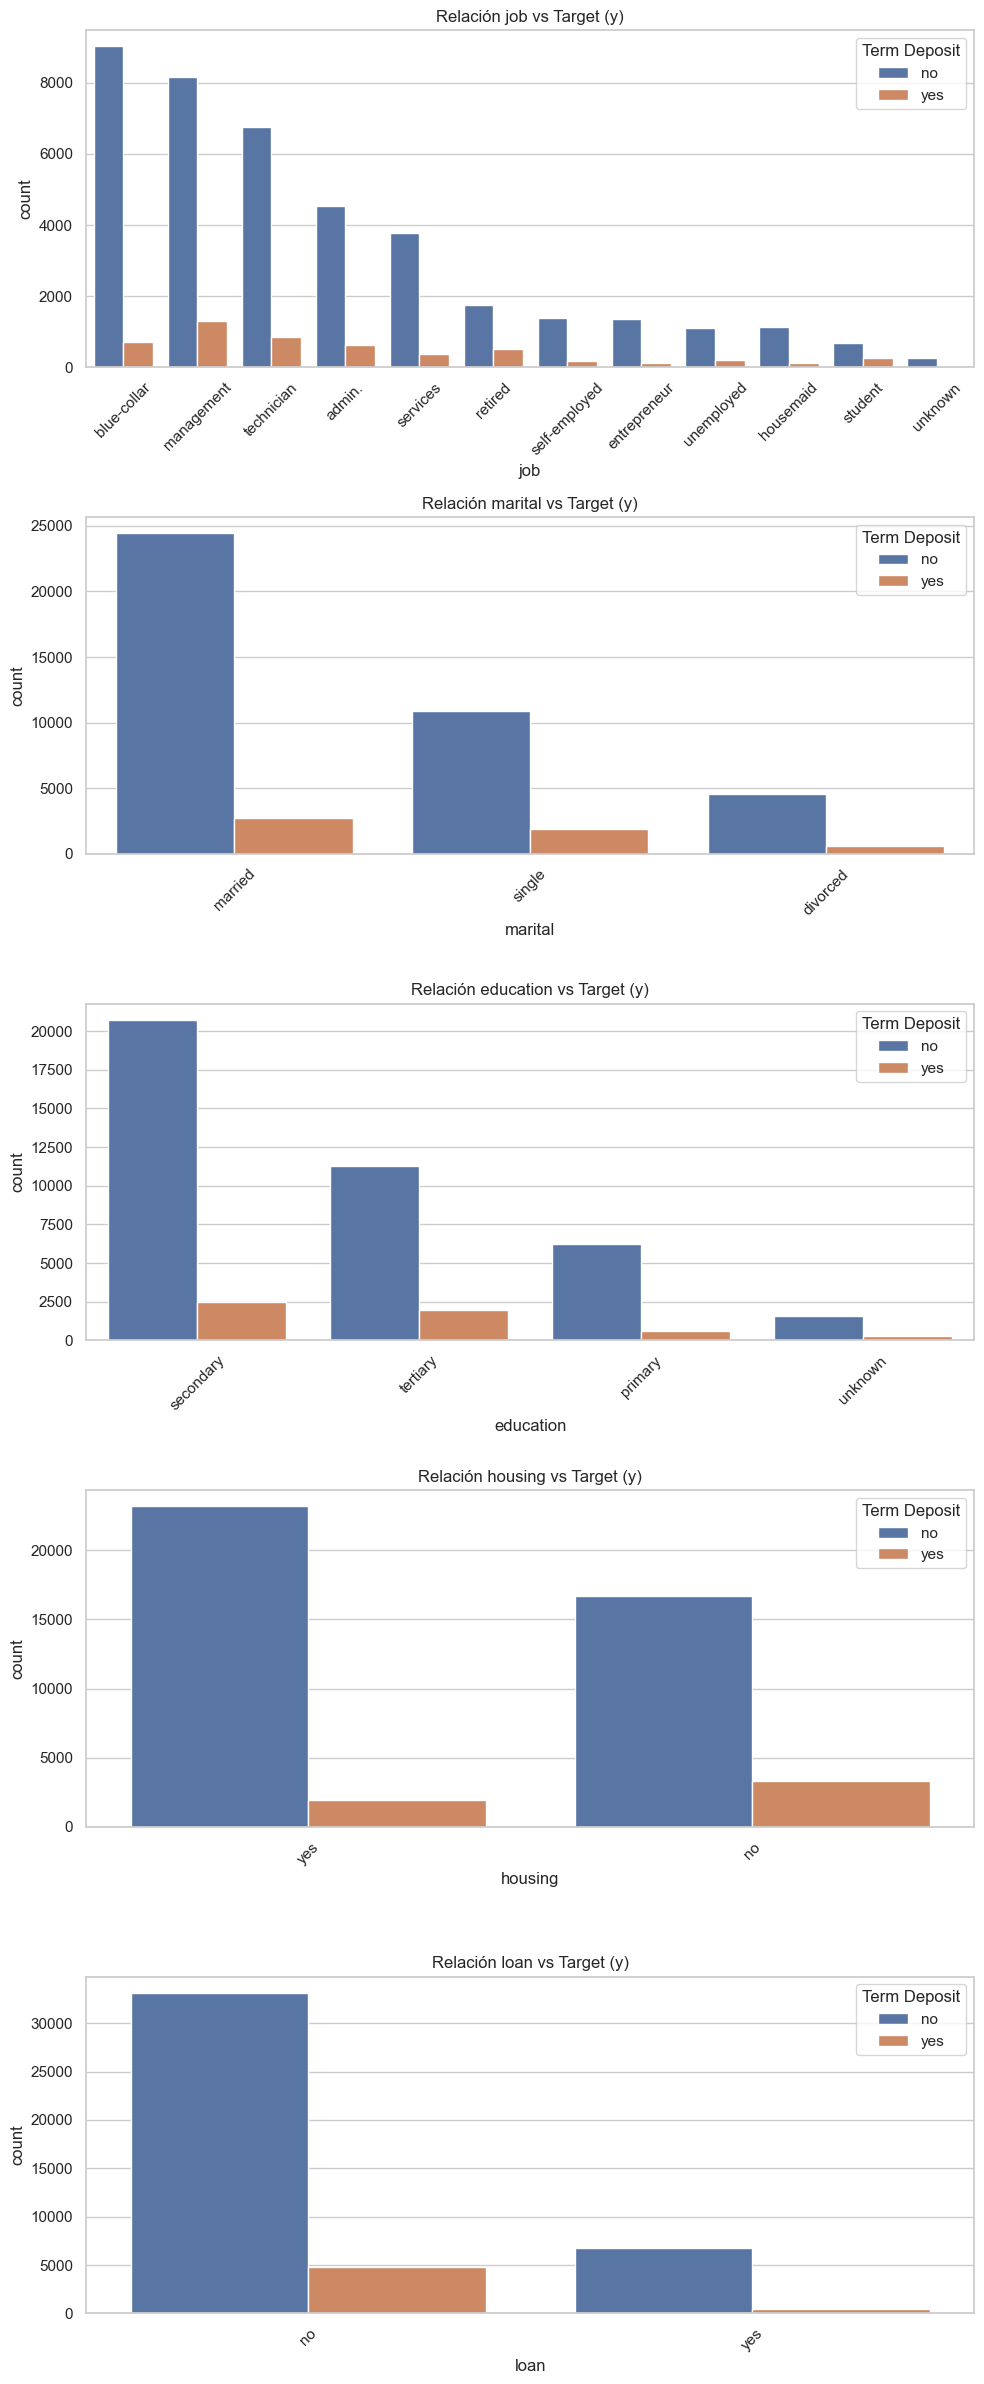

In [11]:
# 3. Relación Categóricas vs Variable Objetivo
cat_cols = ['job', 'marital', 'education', 'housing', 'loan']
fig, axes = plt.subplots(len(cat_cols), 1, figsize=(10, 24))
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue='y', data=df_clean, ax=axes[i], order=df_clean[col].value_counts().index)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_title(f'Relación {col} vs Target (y)')
    axes[i].legend(title='Term Deposit', loc='upper right')
plt.tight_layout()
plt.show()

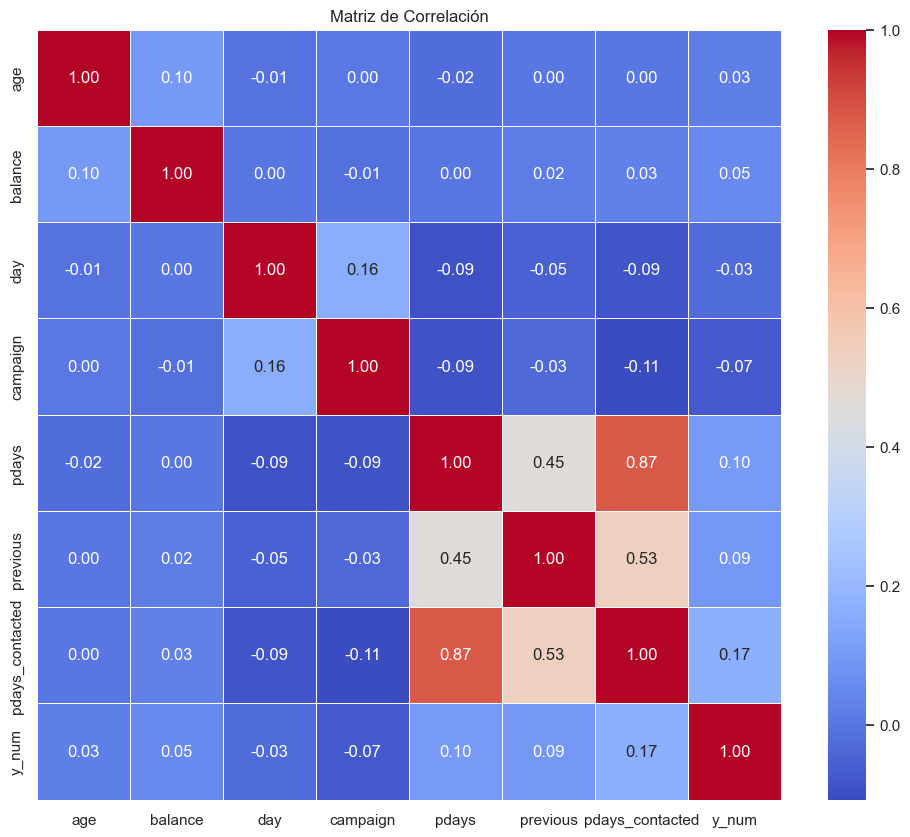

In [12]:
# 4. Matriz de Correlación
# Convertir target a numérico para ver correlación
df_clean['y_num'] = df_clean['y'].map({'yes': 1, 'no': 0})
numeric_df = df_clean.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

### Preprocesamiento

- **Encoding:** Transformación de texto a número

In [13]:
# 1. Separación de Features (X) y Target (y)
# Usamos df_clean que generamos en el paso anterior (sin 'duration')
X = df_clean.drop(columns=['y', 'y_num'], errors='ignore') # Eliminamos target y auxiliares
y = df_clean['y'].map({'yes': 1, 'no': 0}) # Encoding del target a binario

# 2. Encoding de Variables Categóricas
# Identificamos columnas categóricas y numéricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

print(f"Variables Categóricas a codificar: {categorical_cols}")
print(f"Variables Numéricas a escalar: {numerical_cols}")

Variables Categóricas a codificar: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Variables Numéricas a escalar: ['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'pdays_contacted']


In [14]:
# Aplicamos One-Hot Encoding
# drop_first=True evita la multicolinealidad (trampa de variables dummy), útil para modelos lineales
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(f"Dimensiones después del encoding: {X_encoded.shape}")

Dimensiones después del encoding: (45211, 42)


- **Stratify:** De acuerdo a lo observado originalmente en el dataset, es crucial mantener la misma proporción de ambos conjuntos de clases (88% y 12%)

In [15]:
# 3. División Train / Test (Estratificada)
# Usamos stratify=y para mantener la proporción de 88/12 en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (31647, 42), Test shape: (13564, 42)


- **Escalamiento:** Proceso Obligatorio para modelos SVM y K-Means, para calcular distancias. Para escalar las variables 'balance' y 'age'

In [16]:
# 4. Escalamiento de Variables
# Importante: El scaler se ajusta (fit) SOLO con el conjunto de TRAIN para evitar data leakage.
# Luego se transforma el Test con los parámetros aprendidos del Train.

scaler = StandardScaler()

In [18]:
# Solo escalamos las columnas que originalmente eran numéricas
# (Las dummies generadas ya están en 0 y 1, no es estrictamente necesario escalarlas,
# pero escalar todo el conjunto X es práctica común en SVM para homogeneizar la varianza).
# Aquí escalaremos todo el X_encoded para facilitar la implementación en SVM/K-Means.

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertimos de nuevo a DataFrame para mantener los nombres de columnas (útil para interpretación)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_encoded.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_encoded.columns)

print("\nPreprocesamiento completado.")
print("Primeras 5 filas de X_train_scaled:")
display(X_train_scaled.head())


Preprocesamiento completado.
Primeras 5 filas de X_train_scaled:


,age,balance,day,campaign,pdays,previous,pdays_contacted,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,-0.930461,-0.443813,-0.817039,-0.566850,-0.410038,-0.234774,-0.470453,-0.526372,-0.184701,-0.170402,...,2.351710,-0.365250,-0.103746,-0.661996,-0.309777,-0.130258,-0.11112,-0.207056,-0.18534,0.470203
1,-0.553871,-0.380625,0.143236,-0.566850,-0.410038,-0.234774,-0.470453,-0.526372,-0.184701,-0.170402,...,-0.425222,-0.365250,-0.103746,-0.661996,-0.309777,-0.130258,-0.11112,-0.207056,-0.18534,0.470203
2,-1.589493,-0.419059,0.023201,-0.244783,-0.410038,-0.234774,-0.470453,1.899798,-0.184701,-0.170402,...,-0.425222,-0.365250,-0.103746,1.510583,-0.309777,-0.130258,-0.11112,-0.207056,-0.18534,0.470203
3,-0.553871,-0.418082,-1.657280,-0.244783,-0.410038,-0.234774,-0.470453,1.899798,-0.184701,-0.170402,...,-0.425222,2.737853,-0.103746,-0.661996,-0.309777,-0.130258,-0.11112,-0.207056,-0.18534,0.470203
4,-0.365576,-0.409939,0.623373,-0.244783,1.175153,1.371081,2.125611,-0.526372,-0.184701,-0.170402,...,-0.425222,-0.365250,-0.103746,-0.661996,3.228124,-0.130258,-0.11112,-0.207056,-0.18534,-2.126743
